In [126]:
import pandas as pd
import matplotlib.pyplot as plt


In [127]:
%store -r clean_death_counts_df
%store -r weekly_data

In [128]:
display(clean_death_counts_df.head())
display(weekly_data.head())

cause_group,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
week_ending_date,,,,,,
2015-01-10,12411,38866,23871,7708,15953,98809
2015-01-17,12735,38081,23991,7766,15185,97758
2015-01-24,11649,36395,23462,7553,14352,93411
2015-01-31,11279,35525,23585,7174,13506,91069
2015-02-07,11045,36279,23454,7056,13020,90854


,Close
Date,
2021-01-10,37.012
2021-01-17,37.052
2021-01-24,36.565
2021-01-31,36.518
2021-02-07,35.088


In [129]:
def add_year_and_week(df, date_column):
    df = df.reset_index()
    df['week'] = df[date_column].dt.isocalendar().week
    df['year'] = df[date_column].dt.year
    return df

In [130]:
clean_death_counts_df = add_year_and_week(clean_death_counts_df, 'week_ending_date')
pfizer_data = add_year_and_week(weekly_data, 'Date')

In [131]:
death_count_pfizer = pd.merge(pfizer_data, clean_death_counts_df, on= ['week', 'year'])
death_count_pfizer.head()

,Date,Close,week,year,week_ending_date,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
0,2021-01-10,37.012,1,2021,2021-01-09,13254,40043,22780,8601,10482,95160
1,2021-01-17,37.052,2,2021,2021-01-16,13423,40153,23812,8839,10396,96623
2,2021-01-24,36.565,3,2021,2021-01-23,13161,39246,23250,8246,9924,93827
3,2021-01-31,36.518,4,2021,2021-01-30,12376,38130,23493,8045,9829,91873
4,2021-02-07,35.088,5,2021,2021-02-06,11954,38553,23297,7921,9840,91565


In [132]:
death_count_pfizer.set_index('Date', inplace=True)

In [133]:
death_count_pfizer

,Close,week,year,week_ending_date,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
Date,,,,,,,,,,
2021-01-10,37.012,1,2021,2021-01-09,13254,40043,22780,8601,10482,95160
2021-01-17,37.052,2,2021,2021-01-16,13423,40153,23812,8839,10396,96623
2021-01-24,36.565,3,2021,2021-01-23,13161,39246,23250,8246,9924,93827
2021-01-31,36.518,4,2021,2021-01-30,12376,38130,23493,8045,9829,91873
2021-02-07,35.088,5,2021,2021-02-06,11954,38553,23297,7921,9840,91565
...,...,...,...,...,...,...,...,...,...,...
2022-11-27,48.830,47,2022,2022-11-26,12408,38590,24197,8036,11675,94906
2022-12-04,50.236,48,2022,2022-12-03,12407,39043,23869,8121,12747,96187
2022-12-11,50.836,49,2022,2022-12-10,12794,39130,24150,8024,13595,97693


In [134]:
death_count_pfizer['total_deaths(1500s)'] = death_count_pfizer['total']/1500

In [136]:
death_count_pfizer['Respiratory diseases(250s)'] = death_count_pfizer['Respiratory diseases']/250

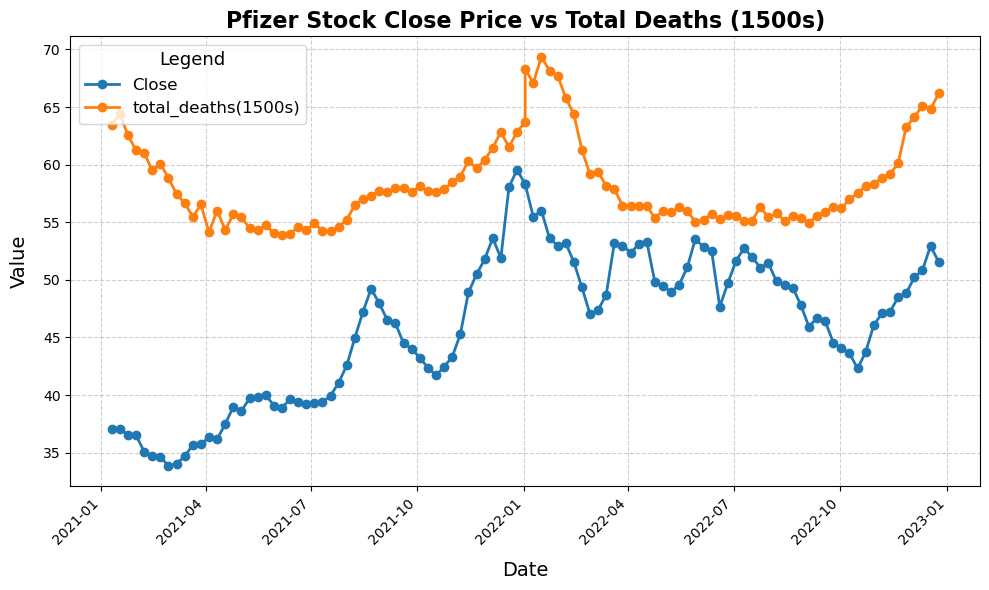

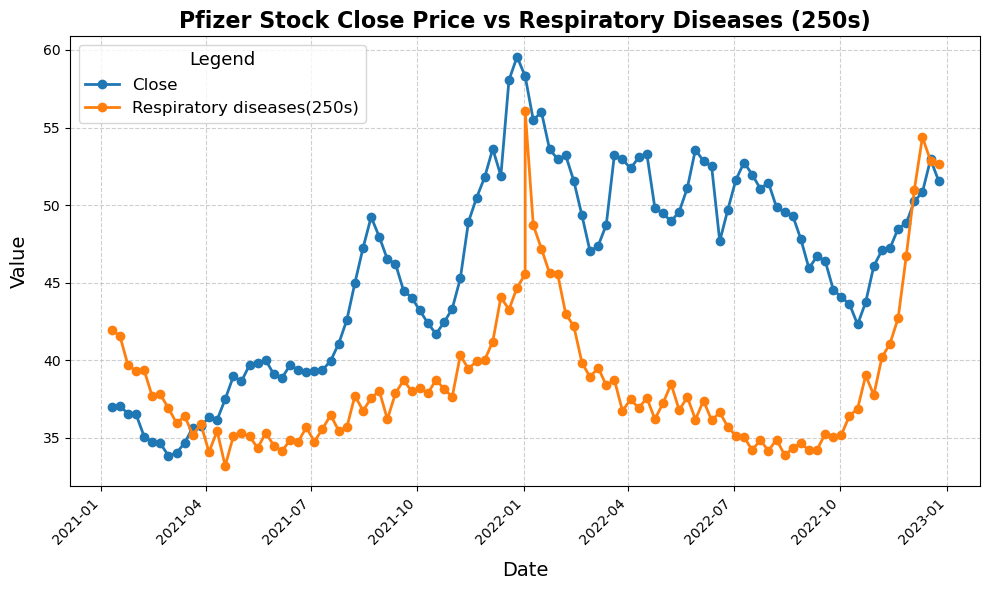

In [139]:
#death_count_pfizer_2 = death_count_pfizer[['Close','Respiratory diseases(250s)']]
#death_count_pfizer_2.plot()
# Assuming death_count_pfizer DataFrame is already defined
death_count_pfizer_1 = death_count_pfizer[['Close', 'total_deaths(1500s)']]
death_count_pfizer_2 = death_count_pfizer[['Close', 'Respiratory diseases(250s)']]

# Plotting Pfizer Stock Close Price vs Total Deaths (1500s)
fig, ax = plt.subplots(figsize=(10, 6))
death_count_pfizer_1.plot(ax=ax, linewidth=2, linestyle='-', marker='o')
ax.set_title('Pfizer Stock Close Price vs Total Deaths (1500s)', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=14, labelpad=10)
ax.set_ylabel('Value', fontsize=14, labelpad=10)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(title='Legend', fontsize=12, title_fontsize='13', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Pfizer Stock Close Price vs Respiratory Diseases (250s)
fig, ax = plt.subplots(figsize=(10, 6))
death_count_pfizer_2.plot(ax=ax, linewidth=2, linestyle='-', marker='o')
ax.set_title('Pfizer Stock Close Price vs Respiratory Diseases (250s)', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=14, labelpad=10)
ax.set_ylabel('Value', fontsize=14, labelpad=10)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.legend(title='Legend', fontsize=12, title_fontsize='13', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
death_count_pfizer.corr()

,Close,week,year,week_ending_date,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total,total_deaths(1500s),Respiratory diseases(250s)
Close,1.000000,0.336974,0.641716,0.692649,0.334054,0.331166,0.380361,0.302497,0.464559,0.383565,0.383565,0.464559
week,0.336974,1.000000,0.032680,0.499931,-0.023559,-0.102353,0.459421,-0.113097,0.255114,0.023384,0.023384,0.255114
year,0.641716,0.032680,1.000000,0.865905,0.242337,0.114355,0.146308,0.105225,0.235825,0.175625,0.175625,0.235825
week_ending_date,0.692649,0.499931,0.865905,1.000000,0.182152,0.022362,0.355346,0.003349,0.306878,0.139814,0.139814,0.306878
Alzheimer disease and dementia,0.334054,-0.023559,0.242337,0.182152,1.000000,0.930467,0.577729,0.916714,0.779981,0.951404,0.951404,0.779981
Circulatory diseases,0.331166,-0.102353,0.114355,0.022362,0.930467,1.000000,0.539583,0.973139,0.834050,0.983805,0.983805,0.834050
Malignant neoplasms,0.380361,0.459421,0.146308,0.355346,0.577729,0.539583,1.000000,0.518934,0.611577,0.635143,0.635143,0.611577
Other select causes,0.302497,-0.113097,0.105225,0.003349,0.916714,0.973139,0.518934,1.000000,0.806374,0.964419,0.964419,0.806374
Respiratory diseases,0.464559,0.255114,0.235825,0.306878,0.779981,0.834050,0.611577,0.806374,1.000000,0.896162,0.896162,1.000000
total,0.383565,0.023384,0.175625,0.139814,0.951404,0.983805,0.635143,0.964419,0.896162,1.000000,1.000000,0.896162


In [140]:
death_count_pfizer_1.corr()

,Close,total_deaths(1500s)
Close,1.000000,0.383565
total_deaths(1500s),0.383565,1.000000


In [141]:
death_count_pfizer_2.corr()

,Close,Respiratory diseases(250s)
Close,1.000000,0.464559
Respiratory diseases(250s),0.464559,1.000000
